In [1]:
!mkdir ../dataset 
!wget -O ../dataset/KDDTrain+_20Percent.txt https://raw.githubusercontent.com/acen20/DEL/master/deep-ensemble-jet/dataset/KDDTrain%2B_20Percent.txt
!wget -O ../dataset/KDDTrain+.txt https://raw.githubusercontent.com/acen20/DEL/master/deep-ensemble-jet/dataset/KDDTrain%2B.txt
!wget -O ../dataset/KDDTest+.txt https://raw.githubusercontent.com/acen20/DEL/master/deep-ensemble-jet/dataset/KDDTest%2B.txt

--2022-03-05 06:48:21--  https://raw.githubusercontent.com/acen20/DEL/master/deep-ensemble-jet/dataset/KDDTrain%2B_20Percent.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3822033 (3.6M) [text/plain]
Saving to: ‘../dataset/KDDTrain+_20Percent.txt’

../dataset/KDDTrain 100%[===================>]   3.64M  --.-KB/s    in 0.07s   

2022-03-05 06:48:21 (51.9 MB/s) - ‘../dataset/KDDTrain+_20Percent.txt’ saved [3822033/3822033]

--2022-03-05 06:48:21--  https://raw.githubusercontent.com/acen20/DEL/master/deep-ensemble-jet/dataset/KDDTrain%2B.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conn

In [2]:
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [3]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Loading Dataset
# Dataset link: https://data.mendeley.com/datasets/xvyv59vwvz/1
# Dataset is present in the current directory containing the code file.
df=pd.read_csv('../dataset/KDDTrain+.txt', header=None)
df2=pd.read_csv('../dataset/KDDTest+.txt', header=None)

## Preprocessing

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
df.columns = [str(i) for i in range(0, len(df.columns))]
df2.columns = [str(i) for i in range(0, len(df2.columns))]

In [7]:
# Replacing Null values with 0. ML classifer cannot learn on Null values
df.fillna(0, inplace=True)
df2.fillna(0, inplace=True)

In [8]:
# Peak on dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
df.shape

(125973, 43)

In [10]:
# Peak on the dataset
df.drop('42',axis=1, inplace=True)
df2.drop('42',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
sub_classes = df.iloc[:,41].value_counts()

In [12]:
print(sub_classes)

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: 41, dtype: int64


In [13]:
r2l = ['ftp_write','guess_passwd', 'imap', 'multihop', 'phf', 'spy','warezclient','warezmaster','xlock', 'xsnoop','named',
       'sendmail','snmpgetattack', 'snmpguess','httptunnel']
u2r = ['buffer_overflow', 'loadmodule','perl','ps','rootkit','sqlattack','xterm']
dos = ['back', 'land', 'neptune', 'smurf', 'teardrop','pod','mailbomb', 'processtable','udpstorm', 'worm','apache2']
probe = ['ipsweep', 'nmap', 'portsweep', 'satan','saint','mscan']

In [14]:
df['41'] = df['41'].map(
    lambda x: 'malicious' if x in r2l 
    else 'malicious' if x in u2r 
    else 'malicious' if x in dos 
    else 'malicious' if x in probe 
    else x
    )

df2['41'] = df2['41'].map(
    lambda x: 'malicious' if x in r2l 
    else 'malicious' if x in u2r 
    else 'malicious' if x in dos 
    else 'malicious' if x in probe 
    else x
    )

### Training set value counts

In [15]:
print(df['41'].value_counts())

normal       67343
malicious    58630
Name: 41, dtype: int64


### Testing set value counts

In [16]:
print(df2['41'].value_counts())

malicious    12833
normal        9711
Name: 41, dtype: int64


In [17]:
# Encodings Labels so that they are compatible with machine leanring classifiers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue
for i in df2:
    if df2[i].dtype=='object':
        df2[i] = le.fit_transform(df2[i])
    else:
        continue
        
X_train = df.drop(['41'],axis=1)
y_train = df['41']

X_test = df2.drop(['41'],axis=1)
y_test = df2['41']

In [18]:
# Scaling data. Default scaling is to scale the data to unit variance (or equivalent
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_train = torch.tensor(X_train, dtype=torch.float)

X_test = mms.fit_transform(X_test)
X_test = torch.tensor(X_test, dtype=torch.float)

## **Sparse AE**



In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
pt_x_train = X_train.to(device)
pt_y_train = torch.tensor(y_train, dtype=torch.float).type(torch.LongTensor).to(device)
X_test = X_test.to(device)
y_test = torch.tensor(y_test, dtype=torch.float).type(torch.LongTensor).to(device)
pt_train = TensorDataset(pt_x_train, pt_y_train)
pt_train = DataLoader(pt_train, batch_size=64)
current_dims = 41

In [20]:
class Encoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(current_dims, current_dims),
        nn.BatchNorm1d(current_dims),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(current_dims,current_dims ),
        nn.BatchNorm1d(current_dims),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(current_dims, current_dims),
        nn.BatchNorm1d(current_dims),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(current_dims, current_dims),
        nn.BatchNorm1d(current_dims),
        nn.ReLU(),
    )

  def forward(self, x):
    encoded = self.encoder(x)
    return encoded

In [21]:
class Decoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.decoder = nn.Sequential(
        nn.Linear(current_dims, current_dims),
        nn.BatchNorm1d(current_dims),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(current_dims, current_dims),
        nn.BatchNorm1d(current_dims),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(current_dims, current_dims),
        nn.BatchNorm1d(current_dims),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(current_dims, current_dims),
        nn.ReLU()
    )

  def forward(self, x):
    decoded = self.decoder(x)
    return decoded

In [22]:
encoder = Encoder().to(device)
decoder = Decoder().to(device)
parameters = list(encoder.parameters())+ list(decoder.parameters())
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr = 4e-3, weight_decay=0)

In [23]:
num_epochs = 50
outputs = []
losses = []
for epoch in range(num_epochs):
  for instance,_ in pt_train:
    encoded = encoder(instance)
    reconstructed = decoder(encoded)
    loss = criterion(reconstructed, instance)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')

Epoch:1, Loss:0.0094
Epoch:2, Loss:0.0069
Epoch:3, Loss:0.0056
Epoch:4, Loss:0.0078
Epoch:5, Loss:0.0076
Epoch:6, Loss:0.0052
Epoch:7, Loss:0.0054
Epoch:8, Loss:0.0053
Epoch:9, Loss:0.0067
Epoch:10, Loss:0.0059
Epoch:11, Loss:0.0056
Epoch:12, Loss:0.0066
Epoch:13, Loss:0.0047
Epoch:14, Loss:0.0063
Epoch:15, Loss:0.0050
Epoch:16, Loss:0.0050
Epoch:17, Loss:0.0047
Epoch:18, Loss:0.0059
Epoch:19, Loss:0.0059
Epoch:20, Loss:0.0067
Epoch:21, Loss:0.0046
Epoch:22, Loss:0.0041
Epoch:23, Loss:0.0074
Epoch:24, Loss:0.0054
Epoch:25, Loss:0.0049
Epoch:26, Loss:0.0049
Epoch:27, Loss:0.0048
Epoch:28, Loss:0.0051
Epoch:29, Loss:0.0043
Epoch:30, Loss:0.0048
Epoch:31, Loss:0.0053
Epoch:32, Loss:0.0048
Epoch:33, Loss:0.0045
Epoch:34, Loss:0.0044
Epoch:35, Loss:0.0047
Epoch:36, Loss:0.0044
Epoch:37, Loss:0.0055
Epoch:38, Loss:0.0038
Epoch:39, Loss:0.0050
Epoch:40, Loss:0.0054
Epoch:41, Loss:0.0047
Epoch:42, Loss:0.0059
Epoch:43, Loss:0.0037
Epoch:44, Loss:0.0058
Epoch:45, Loss:0.0057
Epoch:46, Loss:0.00

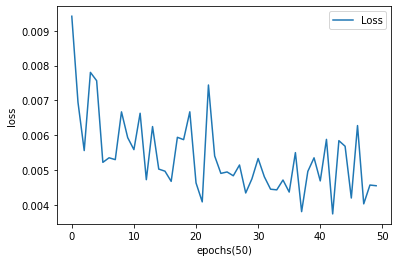

In [24]:
plt.plot(losses)
plt.xlabel(f"epochs({num_epochs})")
plt.ylabel(f"loss")
_ = plt.legend(['Loss'])

In [25]:
encoder.eval()
with torch.no_grad():
  train_X = encoder(X_train.to(device)).cpu()
  X_test = encoder(X_test.to(device)).cpu()

In [26]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(5,10), random_state=1)
clf.fit(train_X, y_train)

MLPClassifier(hidden_layer_sizes=(5, 10), random_state=1)

In [27]:
y_pred = clf.predict(X_test)

0.7450319375443577
Test accuracy is:0.7450
Precision: 0.9631 Recall: 0.6344


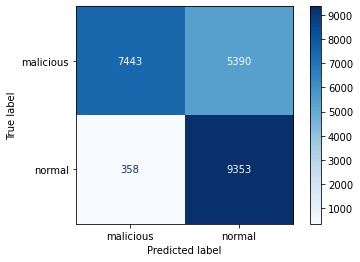

In [28]:
acc = accuracy_score(y_pred, y_test)
print(acc)
_ = ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap="Blues", display_labels = le.classes_)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn=cm[0][0] #tn
fn=cm[0][1] #fn
fp=cm[1][0] #fp
tp=cm[1][1] #tp
acc= (tp+tn)/(tp+tn+fn+fp)
epsilon = 1e-7 # is used so that to avoid divide by zero error
precision = tp / (tp + fp + epsilon)
recall = tp / (tp + fn + epsilon)
sensitivity,specificity = tp/(tp+fn),tn/(tn+fp)
print("Test accuracy is:"+str(format(acc,'.4f')))
print("Precision: "+str(format(precision,'.4f'))+" Recall: "+str(format(recall,'.4f')))

In [29]:
le.inverse_transform([i for i in range(0,2)])

array(['malicious', 'normal'], dtype=object)

In [30]:
torch.save(encoder.state_dict(), 'sparse_encoder.pt')